In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('data/Train.csv')
test = pd.read_csv('data/Test.csv')

In [12]:
np.unique(np.hstack([train.user_id.values, test.user_id.values])).shape[0], test.shape[0] + train.shape[0]

(2534175, 2534175)

In [31]:
(np.sort(train.user_id.values) == train.user_id.values).all(), (np.sort(test.user_id.values) == test.user_id.values).all()

(True, True)

In [20]:
(np.sort(np.hstack([train.user_id.values, test.user_id.values])) ==
    np.hstack([train.user_id.values, test.user_id.values])).all()

False

In [19]:
np.hstack([train.user_id.values, test.user_id.values])

array(['00000bfd7d50f01092811bc0c8d7b0d6fe7c3596',
       '00000cb4a5d760de88fecb38e2f71b7bec52e834',
       '00001654a9d9f96303d9969d0a4a851714a4bb57', ...,
       'ffff0dcc1ab9812bf205b6d76e9d084053cd96f5',
       'ffff91ea6a09a0c8ea42bc6ae33df4b5e06283dc',
       'ffffb393b346f5348034e6e22be93778d94d4beb'], dtype=object)

In [27]:
symb = [[] for _ in range(len(train.user_id[0]))]

for i in range(len(train.user_id[0])):
    symb[i] = train.user_id.apply(lambda x: x[0]).unique()

In [28]:
symb

[array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c',
        'd', 'e', 'f'], dtype=object),
 array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c',
        'd', 'e', 'f'], dtype=object),
 array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c',
        'd', 'e', 'f'], dtype=object),
 array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c',
        'd', 'e', 'f'], dtype=object),
 array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c',
        'd', 'e', 'f'], dtype=object),
 array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c',
        'd', 'e', 'f'], dtype=object),
 array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c',
        'd', 'e', 'f'], dtype=object),
 array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c',
        'd', 'e', 'f'], dtype=object),
 array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c',
        'd', 'e', 'f'], dtype=o

<AxesSubplot:>

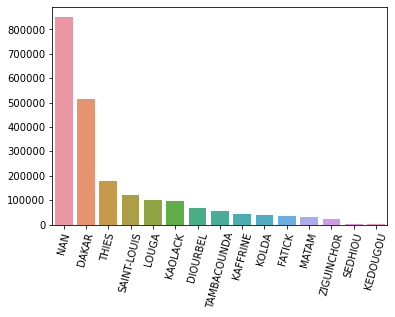

In [61]:
train.REGION.fillna('NAN', inplace=True)
info = train.REGION.value_counts()

plt.xticks(rotation=75)
sns.barplot(x=info.index, y=info.values)

<AxesSubplot:xlabel='REGION'>

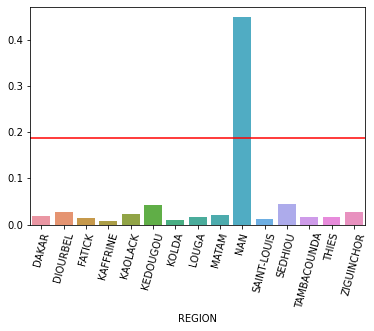

In [62]:
info = train.groupby('REGION').CHURN.mean()

plt.xticks(rotation=75)
plt.axhline(y=train.CHURN.mean(), color='r', linestyle='-')
sns.barplot(x=info.index, y=info.values)

<AxesSubplot:>

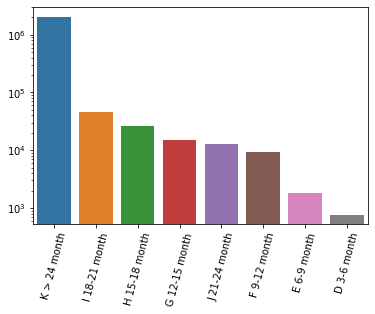

In [63]:
train.TENURE.fillna('NAN', inplace=True)
info = train.TENURE.value_counts()

plt.xticks(rotation=75)
sns.barplot(x=info.index, y=info.values, log=True,)

<AxesSubplot:xlabel='TENURE'>

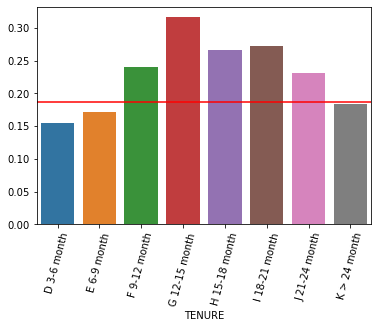

In [64]:
info = train.groupby('TENURE').CHURN.mean()

plt.xticks(rotation=75)
plt.axhline(y=train.CHURN.mean(), color='r', linestyle='-')
sns.barplot(x=info.index, y=info.values)

In [66]:
train.MONTANT.describe()

count    1.397309e+06
mean     5.532117e+03
std      7.111339e+03
min      1.000000e+01
25%      1.000000e+03
50%      3.000000e+03
75%      7.350000e+03
max      4.700000e+05
Name: MONTANT, dtype: float64

In [116]:
train.groupby(train.MONTANT.isna()).CHURN.mean()

MONTANT
False    0.050035
True     0.441463
Name: CHURN, dtype: float64

<AxesSubplot:xlabel='MONTANT', ylabel='Count'>

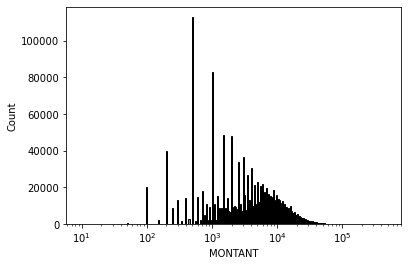

In [75]:
# train.MONTANT.fillna(0, inplace=True)

sns.histplot(train.MONTANT, log_scale=True)

<AxesSubplot:xlabel='CHURN', ylabel='MONTANT'>

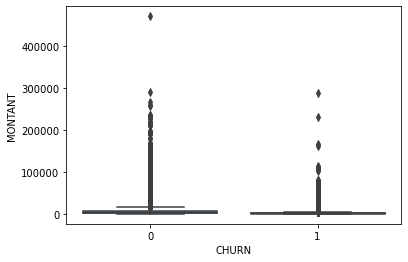

In [78]:
sns.boxplot(x='CHURN', y='MONTANT', data=train)

<AxesSubplot:xlabel='MONTANT', ylabel='Density'>

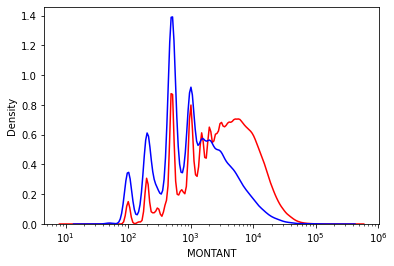

In [99]:
sns.kdeplot(train[train.CHURN==0].MONTANT, log_scale=True, color='r')
sns.kdeplot(train[train.CHURN==1].MONTANT, log_scale=True, color='b')

In [117]:
train.groupby(train.FREQUENCE_RECH.isna()).CHURN.mean()

FREQUENCE_RECH
False    0.050035
True     0.441463
Name: CHURN, dtype: float64

<AxesSubplot:xlabel='FREQUENCE_RECH', ylabel='Density'>

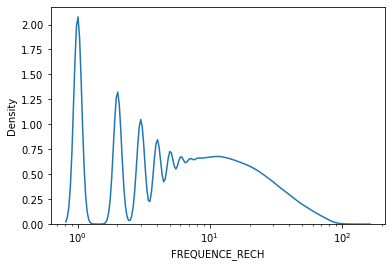

In [103]:
sns.kdeplot(train.FREQUENCE_RECH, log_scale=True)

<AxesSubplot:xlabel='FREQUENCE_RECH', ylabel='Density'>

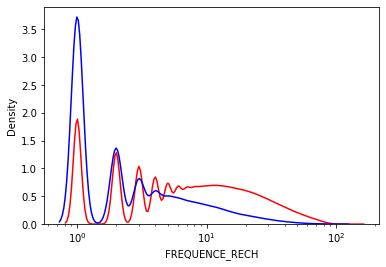

In [106]:
sns.kdeplot(train[train.CHURN==0].FREQUENCE_RECH, log_scale=True, color='r')
sns.kdeplot(train[train.CHURN==1].FREQUENCE_RECH, log_scale=True, color='b')

<AxesSubplot:xlabel='FREQUENCE_RECH', ylabel='Density'>

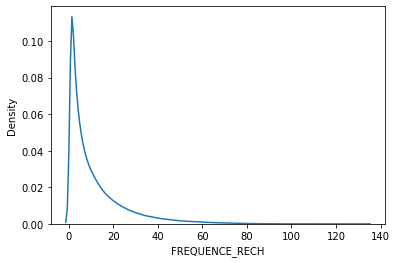

In [110]:
sns.kdeplot(train.FREQUENCE_RECH)

<AxesSubplot:xlabel='FREQUENCE_RECH', ylabel='Density'>

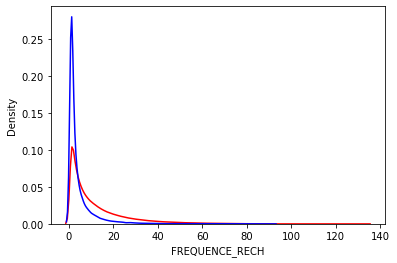

In [109]:
sns.kdeplot(train[train.CHURN==0].FREQUENCE_RECH, color='r')
sns.kdeplot(train[train.CHURN==1].FREQUENCE_RECH, color='b')

In [119]:
train.groupby(train.REVENUE.isna()).CHURN.mean()

REVENUE
False    0.054057
True     0.450098
Name: CHURN, dtype: float64

In [20]:
train.groupby(train.CHURN).FREQUENCE_RECH.mean()

CHURN
0    11.905164
1     4.389507
Name: FREQUENCE_RECH, dtype: float64

<AxesSubplot:xlabel='REVENUE', ylabel='Density'>

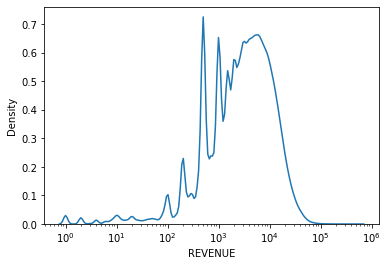

In [120]:
sns.kdeplot(train.REVENUE, log_scale=True)

<AxesSubplot:xlabel='REVENUE', ylabel='Density'>

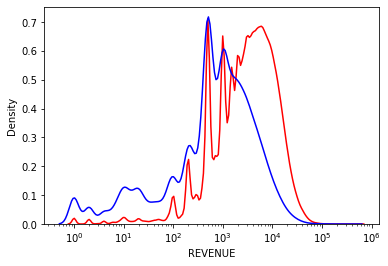

In [121]:
sns.kdeplot(train[train.CHURN==0].REVENUE, log_scale=True, color='r')
sns.kdeplot(train[train.CHURN==1].REVENUE, log_scale=True, color='b')

In [41]:
(train.REVENUE / 3 - train.ARPU_SEGMENT) > 0.1

0          False
1          False
2          False
3          False
4           True
           ...  
2154043    False
2154044     True
2154045    False
2154046     True
2154047    False
Length: 2154048, dtype: bool

In [39]:
train.groupby((train.REVENUE / 3 - train.ARPU_SEGMENT) > 0.1).CHURN.mean()

False    0.224679
True     0.056587
Name: CHURN, dtype: float64

In [21]:
train.ARPU_SEGMENT

0          1417.0
1             NaN
2           340.0
3          4501.0
4           328.0
            ...  
2154043       NaN
2154044    1933.0
2154045       NaN
2154046    2373.0
2154047       NaN
Name: ARPU_SEGMENT, Length: 2154048, dtype: float64

In [123]:
train.groupby(train.ARPU_SEGMENT.isna()).CHURN.mean()

ARPU_SEGMENT
False    0.054057
True     0.450098
Name: CHURN, dtype: float64

In [133]:
train.groupby('CHURN').ARPU_SEGMENT.mean()

CHURN
0    1902.275791
1     693.676849
Name: ARPU_SEGMENT, dtype: float64

<AxesSubplot:xlabel='ARPU_SEGMENT', ylabel='Density'>

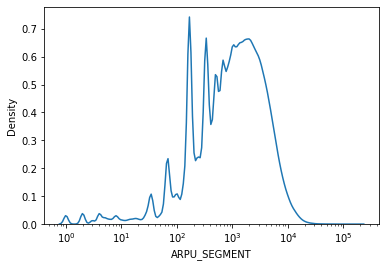

In [129]:
sns.kdeplot(train.ARPU_SEGMENT + 1, log_scale=True)

<AxesSubplot:xlabel='ARPU_SEGMENT', ylabel='Density'>

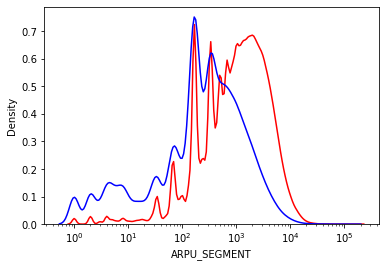

In [130]:
sns.kdeplot(train[train.CHURN==0].ARPU_SEGMENT + 1, log_scale=True, color='r')
sns.kdeplot(train[train.CHURN==1].ARPU_SEGMENT + 1, log_scale=True, color='b')

In [134]:
train.groupby(train.FREQUENCE.isna()).CHURN.mean()

FREQUENCE
False    0.054057
True     0.450098
Name: CHURN, dtype: float64

In [135]:
train.groupby('CHURN').FREQUENCE.mean()

CHURN
0    14.467675
1     5.411760
Name: FREQUENCE, dtype: float64

<AxesSubplot:xlabel='FREQUENCE_RECH', ylabel='FREQUENCE'>

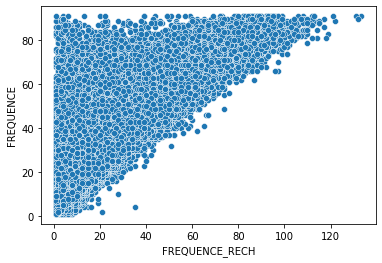

In [47]:
sns.scatterplot(data=train, x='FREQUENCE_RECH', y='FREQUENCE')

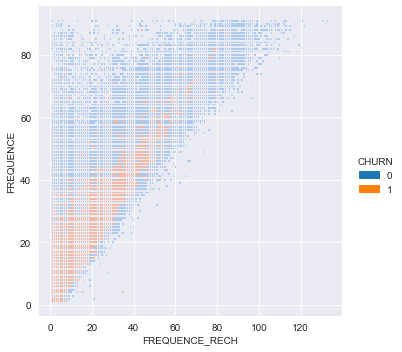

In [6]:
sns.set_style("darkgrid")
sns.displot(data=train, x='FREQUENCE_RECH', y='FREQUENCE', hue="CHURN")

<AxesSubplot:xlabel='FREQUENCE', ylabel='Density'>

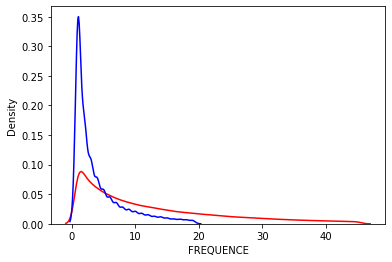

In [44]:
sns.kdeplot(
    train[train.CHURN==0].FREQUENCE[train[train.CHURN==0].FREQUENCE < train[train.CHURN==0].FREQUENCE.quantile(0.95)], color='r')
sns.kdeplot(
    train[train.CHURN==1].FREQUENCE[train[train.CHURN==1].FREQUENCE < train[train.CHURN==1].FREQUENCE.quantile(0.95)], color='b')

<AxesSubplot:xlabel='FREQUENCE', ylabel='Density'>

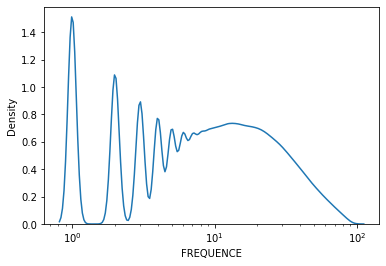

In [139]:
sns.kdeplot(train.FREQUENCE, log_scale=True)

<AxesSubplot:xlabel='FREQUENCE', ylabel='Density'>

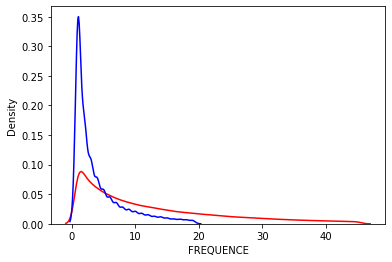

In [44]:
sns.kdeplot(
    train[train.CHURN==0].FREQUENCE[train[train.CHURN==0].FREQUENCE < train[train.CHURN==0].FREQUENCE.quantile(0.95)], color='r')
sns.kdeplot(
    train[train.CHURN==1].FREQUENCE[train[train.CHURN==1].FREQUENCE < train[train.CHURN==1].FREQUENCE.quantile(0.95)], color='b')

<AxesSubplot:xlabel='FREQUENCE', ylabel='Density'>

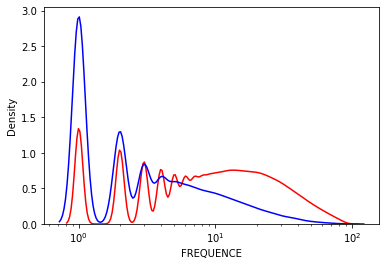

In [138]:
sns.kdeplot(train[train.CHURN==0].FREQUENCE, log_scale=True, color='r')
sns.kdeplot(train[train.CHURN==1].FREQUENCE, log_scale=True, color='b')

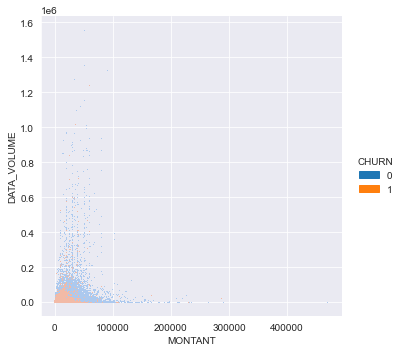

In [7]:
sns.set_style("darkgrid")
sns.displot(data=train, x='MONTANT', y='DATA_VOLUME', hue="CHURN")

In [143]:
train.groupby(train.DATA_VOLUME.isna()).CHURN.mean()

DATA_VOLUME
False    0.073024
True     0.305654
Name: CHURN, dtype: float64

In [145]:
train.groupby('CHURN').DATA_VOLUME.mean()

CHURN
0    3487.519452
1    1829.578224
Name: DATA_VOLUME, dtype: float64

<AxesSubplot:xlabel='DATA_VOLUME', ylabel='Density'>

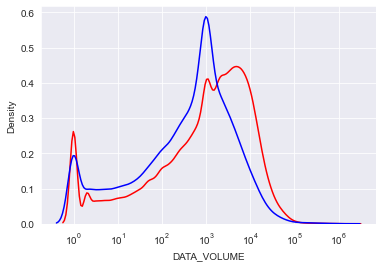

In [9]:
sns.kdeplot(train[(train.CHURN==0)&(train.DATA_VOLUME>0)].DATA_VOLUME, log_scale=True, color='r')
sns.kdeplot(train[(train.CHURN==1)&(train.DATA_VOLUME>0)].DATA_VOLUME, log_scale=True, color='b')

In [151]:
train.groupby(train.ON_NET.isna()).CHURN.mean()

ON_NET
False    0.052004
True     0.423144
Name: CHURN, dtype: float64

In [152]:
train.groupby('CHURN').ON_NET.mean()

CHURN
0    289.686780
1     58.981128
Name: ON_NET, dtype: float64

<AxesSubplot:xlabel='ON_NET', ylabel='Density'>

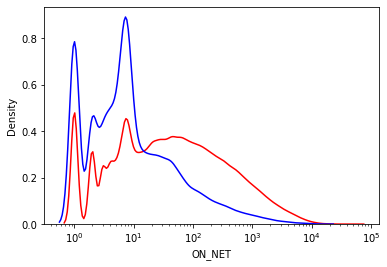

In [155]:
sns.kdeplot(train[(train.CHURN==0)&(train.ON_NET>0)].ON_NET, log_scale=True, color='r')
sns.kdeplot(train[(train.CHURN==1)&(train.ON_NET>0)].ON_NET, log_scale=True, color='b')

In [157]:
train.groupby(train.ORANGE.isna()).CHURN.mean()

ORANGE
False    0.04045
True     0.39438
Name: CHURN, dtype: float64

In [158]:
train.groupby('CHURN').ORANGE.mean()

CHURN
0    98.087055
1    32.119977
Name: ORANGE, dtype: float64

<AxesSubplot:xlabel='ORANGE', ylabel='Density'>

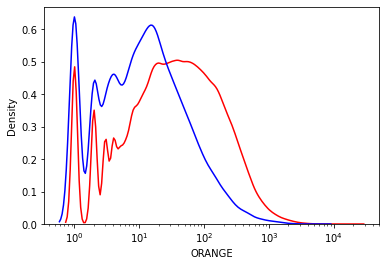

In [160]:
sns.kdeplot(train[(train.CHURN==0)&(train.ORANGE>0)].ORANGE, log_scale=True, color='r')
sns.kdeplot(train[(train.CHURN==1)&(train.ORANGE>0)].ORANGE, log_scale=True, color='b')

In [161]:
train.groupby(train.TIGO.isna()).CHURN.mean()

TIGO
False    0.030779
True     0.292548
Name: CHURN, dtype: float64

In [162]:
train.groupby('CHURN').TIGO.mean()

CHURN
0    23.513369
1    10.383733
Name: TIGO, dtype: float64

<AxesSubplot:xlabel='TIGO', ylabel='Density'>

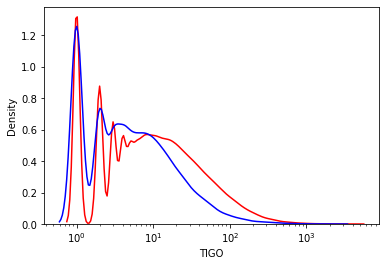

In [163]:
sns.kdeplot(train[(train.CHURN==0)&(train.TIGO>0)].TIGO, log_scale=True, color='r')
sns.kdeplot(train[(train.CHURN==1)&(train.TIGO>0)].TIGO, log_scale=True, color='b')

In [167]:
train.groupby(train.ZONE1.isna()).CHURN.mean()

ZONE1
False    0.044809
True     0.199756
Name: CHURN, dtype: float64

In [169]:
train.groupby('CHURN').ZONE1.mean()

CHURN
0     8.083422
1    10.018540
Name: ZONE1, dtype: float64

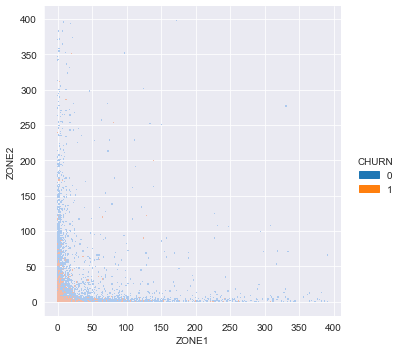

In [13]:
sns.displot(data=train[(train.ZONE1<400)&(train.ZONE2<400)], x='ZONE1', y='ZONE2', hue='CHURN')

<AxesSubplot:xlabel='ZONE1', ylabel='Density'>

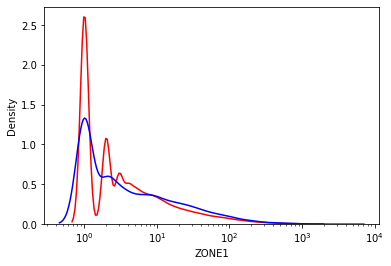

In [171]:
sns.kdeplot(train[(train.CHURN==0)&(train.ZONE1>0)].ZONE1, log_scale=True, color='r')
sns.kdeplot(train[(train.CHURN==1)&(train.ZONE1>0)].ZONE1, log_scale=True, color='b')

In [172]:
train.groupby(train.ZONE2.isna()).CHURN.mean()

ZONE2
False    0.053434
True     0.196644
Name: CHURN, dtype: float64

In [173]:
train.groupby('CHURN').ZONE2.mean()

CHURN
0    7.526426
1    8.029545
Name: ZONE2, dtype: float64

<AxesSubplot:xlabel='ZONE2', ylabel='Density'>

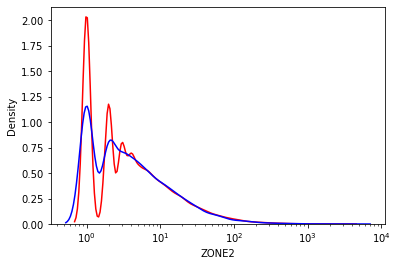

In [174]:
sns.kdeplot(train[(train.CHURN==0)&(train.ZONE2>0)].ZONE2, log_scale=True, color='r')
sns.kdeplot(train[(train.CHURN==1)&(train.ZONE2>0)].ZONE2, log_scale=True, color='b')

In [179]:
train.groupby(train.REGULARITY.isna()).CHURN.mean()

REGULARITY
False    0.187547
Name: CHURN, dtype: float64

In [181]:
train.groupby('CHURN').REGULARITY.mean()

CHURN
0    33.182215
1     5.777349
Name: REGULARITY, dtype: float64

<AxesSubplot:xlabel='REGULARITY', ylabel='Density'>

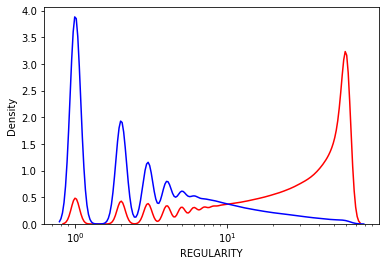

In [184]:
sns.kdeplot(train[(train.CHURN==0)].REGULARITY, log_scale=True, color='r')
sns.kdeplot(train[(train.CHURN==1)].REGULARITY, log_scale=True, color='b').get_lines()[0].get_data()

<AxesSubplot:xlabel='REGULARITY', ylabel='Density'>

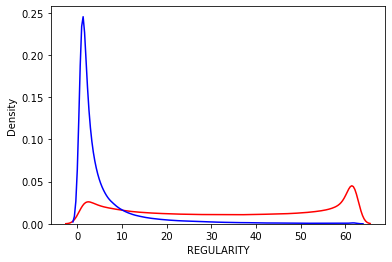

In [185]:
sns.kdeplot(train[(train.CHURN==0)].REGULARITY, color='r')
sns.kdeplot(train[(train.CHURN==1)].REGULARITY, color='b')

<AxesSubplot:xlabel='CHURN', ylabel='REGULARITY'>

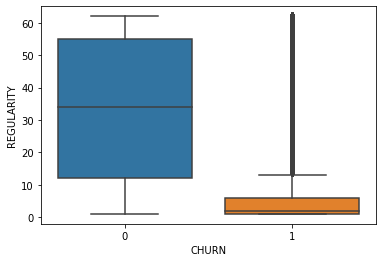

In [186]:
sns.boxplot(x='CHURN', y='REGULARITY', data=train)

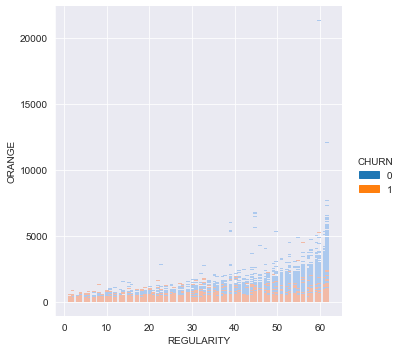

In [22]:
sns.displot(data=train, x='REGULARITY', y='ORANGE', hue='CHURN')

In [188]:
train.corr('spearman')

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
MONTANT,1.000000,0.887088,0.987373,0.987400,0.870563,0.378759,0.509303,0.669221,0.448721,0.214747,0.308915,0.707327,0.811758,-0.166476
FREQUENCE_RECH,0.887088,1.000000,0.879345,0.879345,0.951064,0.296118,0.476079,0.562026,0.362109,0.088113,0.185037,0.677898,0.894183,-0.178293
REVENUE,0.987373,0.879345,1.000000,0.999968,0.880477,0.388967,0.519400,0.678499,0.452685,0.218541,0.311413,0.715618,0.817177,-0.187086
ARPU_SEGMENT,0.987400,0.879345,0.999968,1.000000,0.880400,0.388983,0.519397,0.678507,0.452690,0.218560,0.311420,0.715541,0.817122,-0.187024
FREQUENCE,0.870563,0.951064,0.880477,0.880400,1.000000,0.330565,0.437873,0.528417,0.334575,0.083254,0.193562,0.690583,0.867162,-0.192055
DATA_VOLUME,0.378759,0.296118,0.388967,0.388983,0.330565,1.000000,-0.098136,-0.020986,-0.013691,-0.021646,-0.000430,0.301667,0.229191,-0.063616
ON_NET,0.509303,0.476079,0.519400,0.519397,0.437873,-0.098136,1.000000,0.550778,0.367843,0.065437,-0.022582,0.523249,0.436314,-0.164465
ORANGE,0.669221,0.562026,0.678499,0.678507,0.528417,-0.020986,0.550778,1.000000,0.470777,0.124647,0.049182,0.457344,0.536068,-0.125383
TIGO,0.448721,0.362109,0.452685,0.452690,0.334575,-0.013691,0.367843,0.470777,1.000000,0.077143,0.020566,0.323203,0.350049,-0.073286
ZONE1,0.214747,0.088113,0.218541,0.218560,0.083254,-0.021646,0.065437,0.124647,0.077143,1.000000,0.107106,0.053759,0.098150,0.006077


<AxesSubplot:>

c:\users\ivan\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\ivan\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


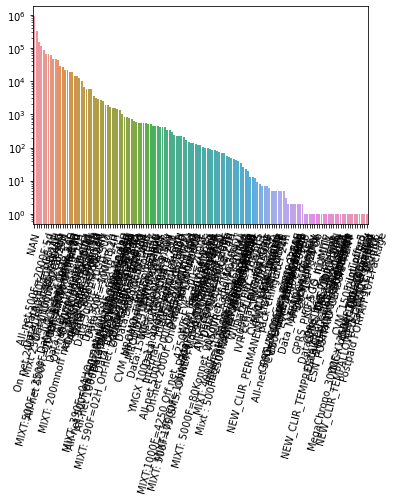

In [192]:
train.TOP_PACK.fillna('NAN', inplace=True)
info = train.TOP_PACK.value_counts()

plt.xticks(rotation=75)
sns.barplot(x=info.index, y=info.values, log=True, )

<AxesSubplot:xlabel='TOP_PACK'>

c:\users\ivan\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\ivan\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


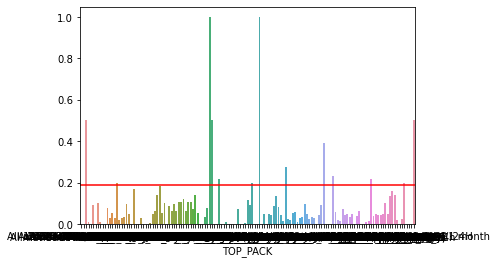

In [193]:
info = train.groupby('TOP_PACK').CHURN.mean()

# plt.xticks(rotation=75)
plt.axhline(y=train.CHURN.mean(), color='r', linestyle='-')
sns.barplot(x=info.index, y=info.values)

In [194]:
train.groupby(train.FREQ_TOP_PACK.isna()).CHURN.mean()

FREQ_TOP_PACK
False    0.040161
True     0.391899
Name: CHURN, dtype: float64

In [195]:
train.groupby('CHURN').FREQ_TOP_PACK.mean()

CHURN
0    9.486246
1    4.163092
Name: FREQ_TOP_PACK, dtype: float64

In [ ]:
sns.kdeplot(data=train[train.FREQ_TOP_PACK<150], x='FREQUENCE_RECH', y='FREQ_TOP_PACK', hue='CHURN')

<AxesSubplot:xlabel='FREQ_TOP_PACK', ylabel='Density'>

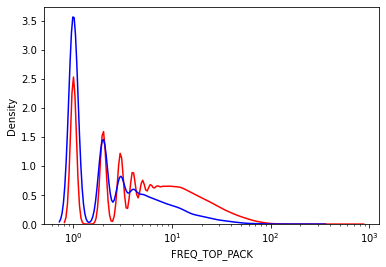

In [231]:
sns.kdeplot(train[(train.CHURN==0)].FREQ_TOP_PACK, log_scale=True, color='r')
sns.kdeplot(train[(train.CHURN==1)].FREQ_TOP_PACK, log_scale=True, color='b')

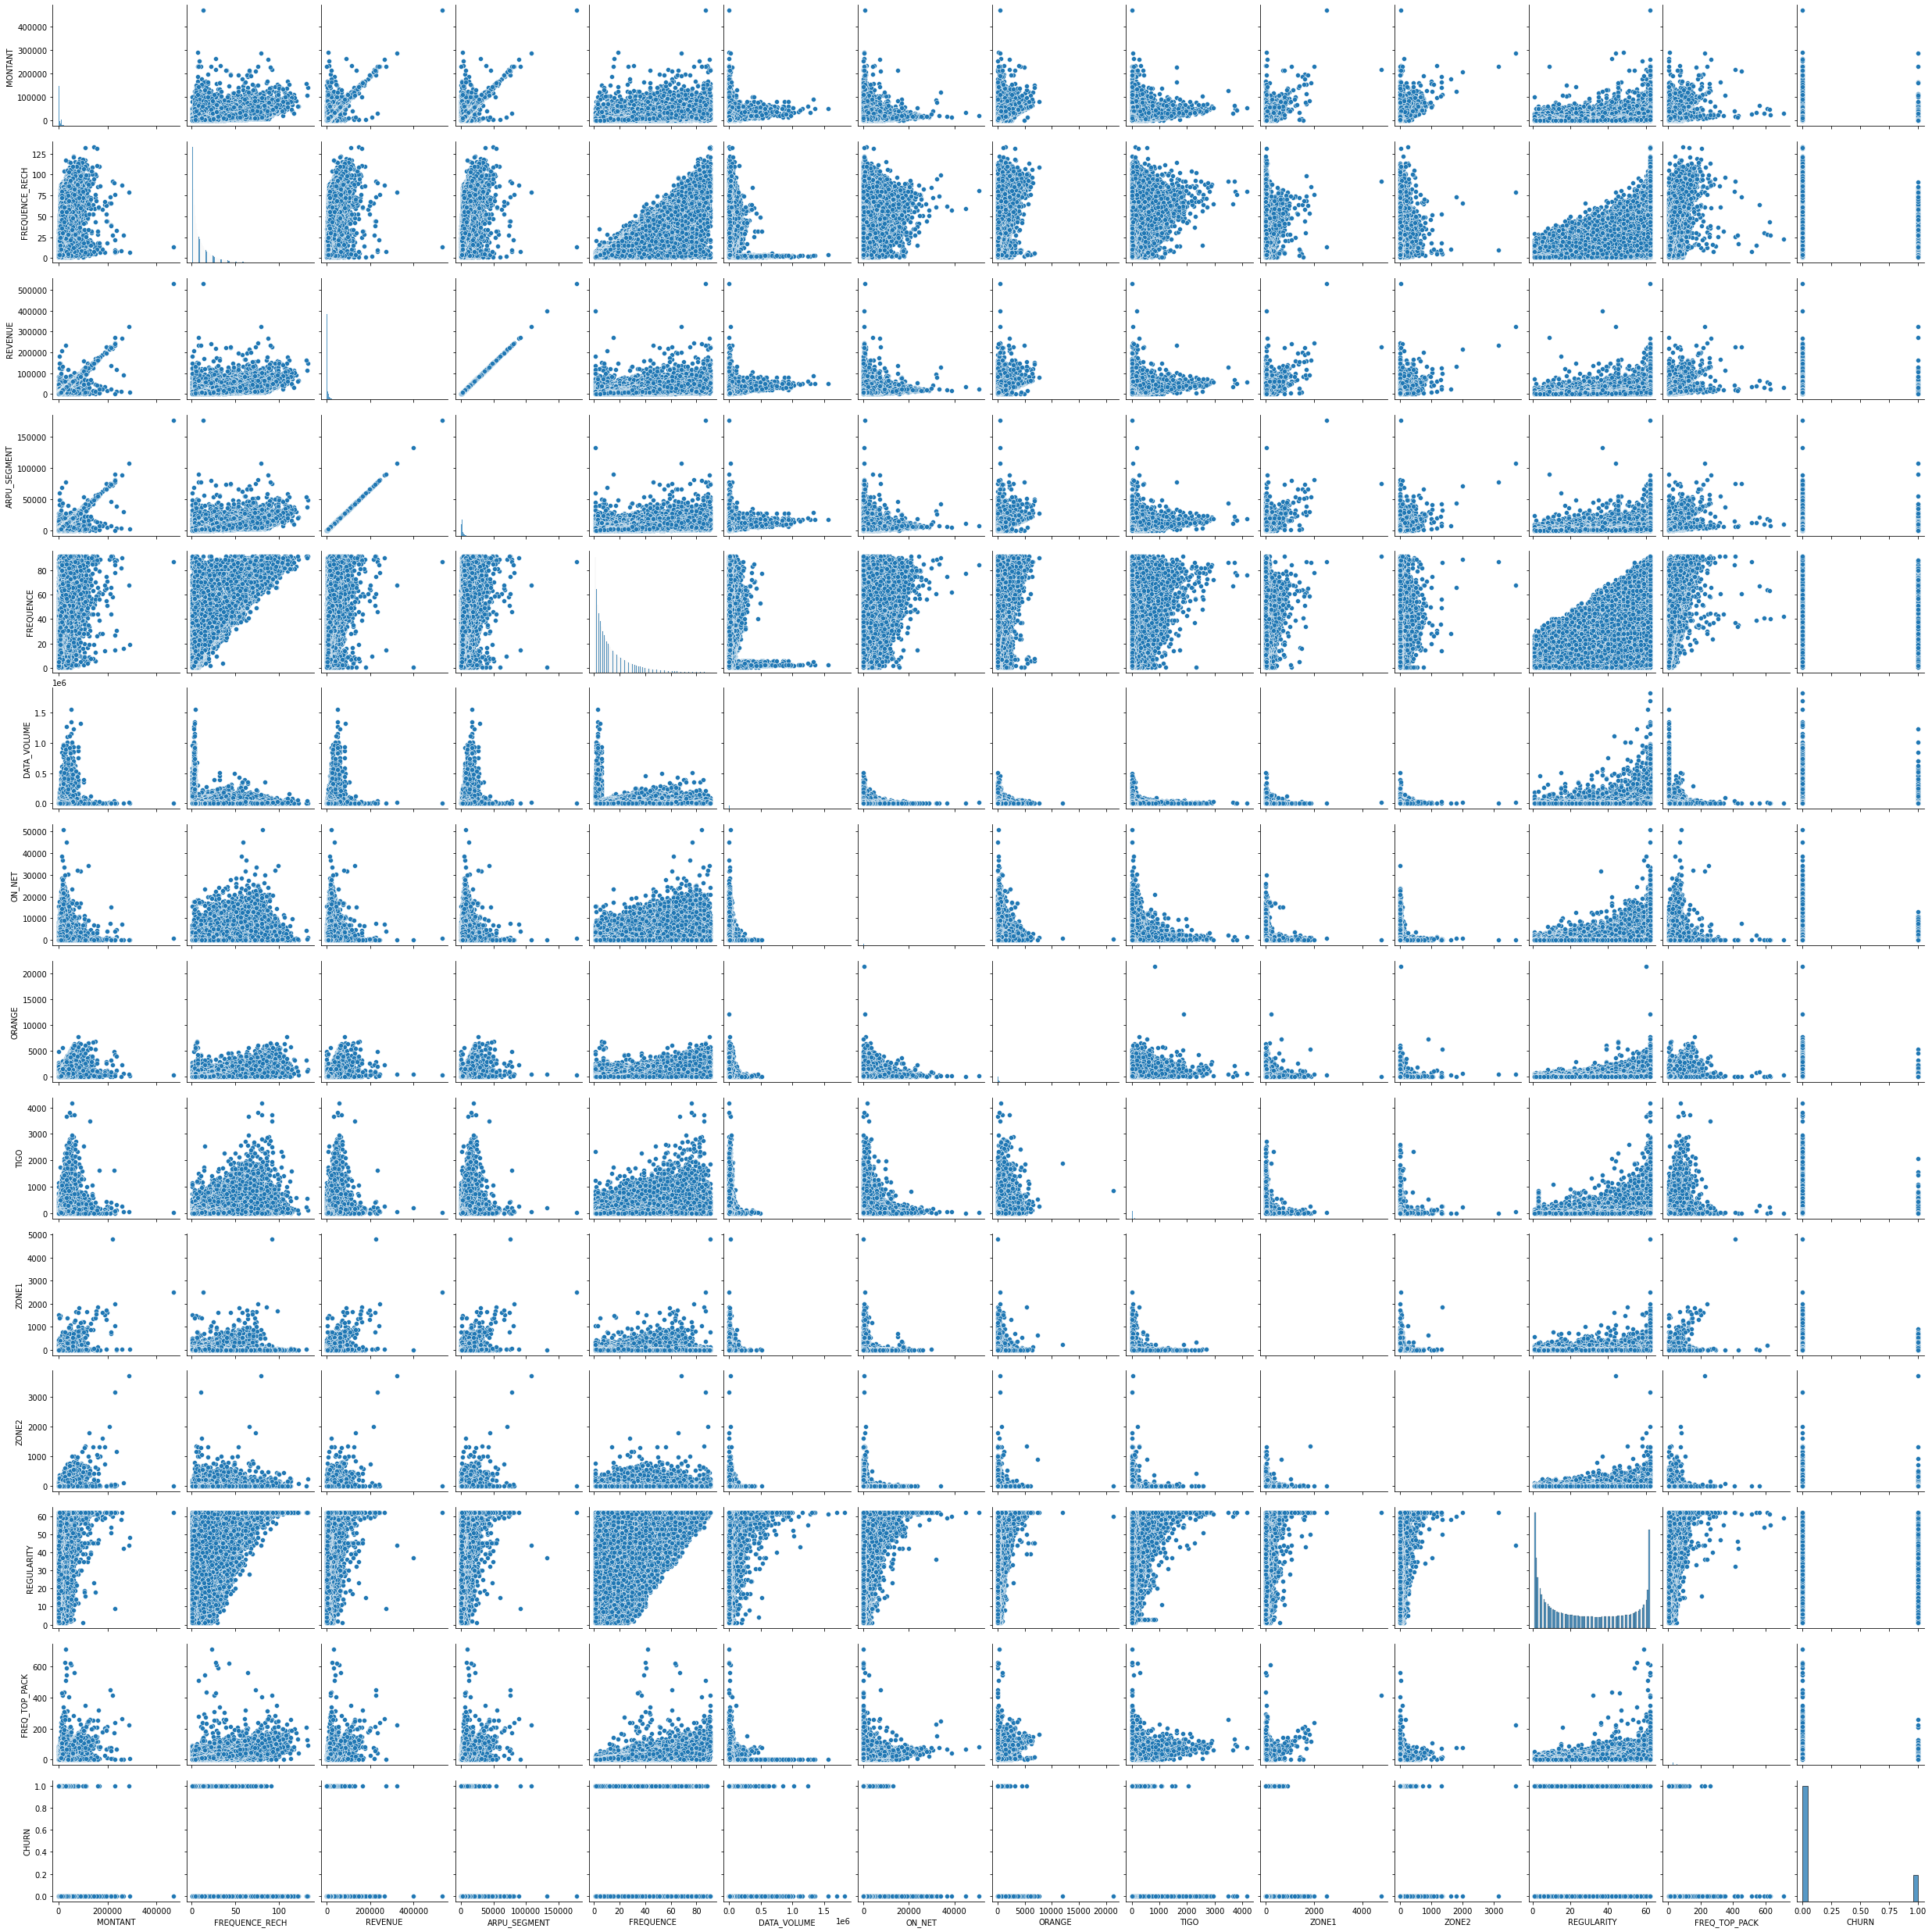

In [206]:
sns.pairplot(train[train.columns[train.dtypes!='object']])

<AxesSubplot:>

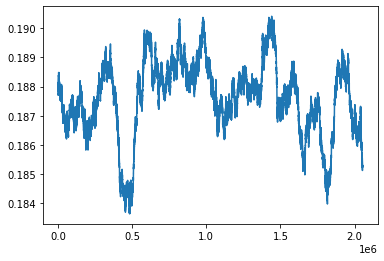

In [224]:
window = 100000

sns.lineplot(y=train.CHURN.rolling(window).mean().values[window:], x=train.index[:-window])

<AxesSubplot:>

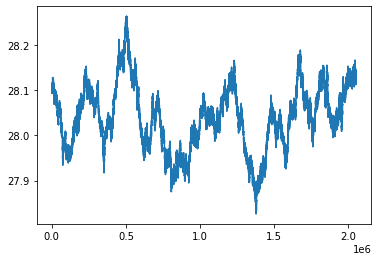

In [229]:
window = 100000

sns.lineplot(y=train.REGULARITY.rolling(window).mean().values[window:], x=train.index[:-window])

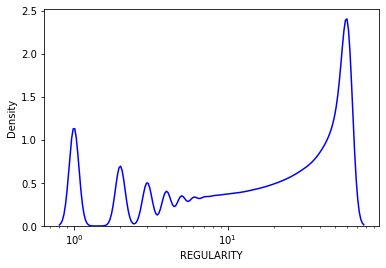

In [276]:
x, y = sns.kdeplot(train.REGULARITY, log_scale=True, color='b').get_lines()[0].get_data()

In [ ]:
train[(train.CHURN==1)].REGULARITY

<a list of 1 Line2D objects>

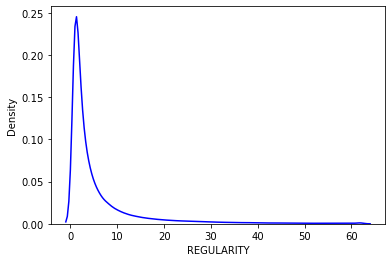

In [274]:
sns.kdeplot(train[(train.CHURN==1)].REGULARITY, color='b').get_lines()

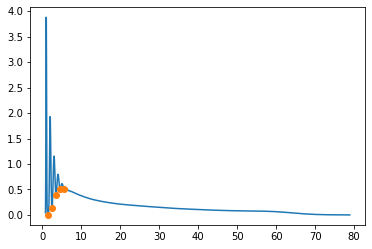

In [255]:
from scipy.signal import argrelextrema

ext, = argrelextrema(y, np.less)
plt.plot(x, y)
plt.plot(x[ext], y[ext], 'o')

In [268]:
ext = [0, *ext, -1]

In [269]:
x[ext]

array([ 0.7859095 ,  1.4351398 ,  2.50206636,  3.54141408,  4.56899299,
        5.62791102, 78.88949009])

In [278]:
train.groupby(pd.cut(train.REGULARITY, x[ext])).CHURN.mean()

REGULARITY
(0.804, 1.459]     0.706874
(1.459, 2.53]      0.575327
(2.53, 3.569]      0.474525
(3.569, 4.593]     0.407332
(4.593, 5.646]     0.351389
(5.646, 77.137]    0.066916
Name: CHURN, dtype: float64

0          (-459.99, 47009.0]
1                         NaN
2          (-459.99, 47009.0]
3          (-459.99, 47009.0]
4          (-459.99, 47009.0]
                  ...        
2154043                   NaN
2154044    (-459.99, 47009.0]
2154045                   NaN
2154046    (-459.99, 47009.0]
2154047                   NaN
Name: MONTANT, Length: 2154048, dtype: category
Categories (10, interval[float64, right]): [(-459.99, 47009.0] < (47009.0, 94008.0] < (94008.0, 141007.0] < (141007.0, 188006.0] ... (282004.0, 329003.0] < (329003.0, 376002.0] < (376002.0, 423001.0] < (423001.0, 470000.0]]

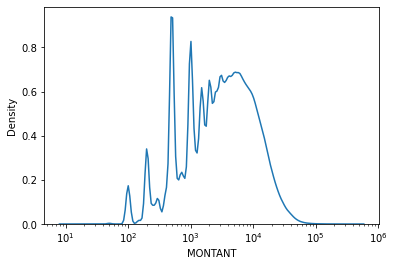

In [10]:
sns.kdeplot(train.MONTANT, log_scale=True)


0.05      250.0
0.15      500.0
0.25     1000.0
0.35     1700.0
0.45     2500.0
0.55     3700.0
0.65     5200.0
0.75     7350.0
0.85    10700.0
0.95    18500.0
Name: MONTANT, dtype: float64

In [26]:
[0] + np.arange(0.05, 1, 0.1)

array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95])

In [27]:
quantiles = [0, *np.arange(0.05, 1, 0.1), 1]
bins = train.MONTANT.quantile(quantiles)
train.groupby(pd.cut(train.MONTANT, bins)).CHURN.mean()

MONTANT
(10.0, 250.0]          0.157769
(250.0, 500.0]         0.113023
(500.0, 1000.0]        0.079491
(1000.0, 1700.0]       0.055942
(1700.0, 2500.0]       0.048125
(2500.0, 3700.0]       0.036206
(3700.0, 5200.0]       0.028979
(5200.0, 7350.0]       0.021235
(7350.0, 10700.0]      0.016579
(10700.0, 18500.0]     0.011561
(18500.0, 470000.0]    0.009846
Name: CHURN, dtype: float64

In [3]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [33]:
train.isna().sum()

user_id                 0
REGION             849299
TENURE                  0
MONTANT            756739
FREQUENCE_RECH     756739
REVENUE            726048
ARPU_SEGMENT       726048
FREQUENCE          726048
DATA_VOLUME       1060433
ON_NET             786675
ORANGE             895248
TIGO              1290016
ZONE1             1984327
ZONE2             2017224
MRG                     0
REGULARITY              0
TOP_PACK           902594
FREQ_TOP_PACK      902594
CHURN                   0
dtype: int64

In [36]:
x = np.log(train.ARPU_SEGMENT.fillna(0.1)).values.reshape(-1, 1)


c:\users\ivan\appdata\local\programs\python\python38\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [41]:
x = np.log(train.FREQ_TOP_PACK.fillna(0.1).values.reshape(-1, 1))
new_data = np.hstack([x])
X_train, X_val, y_train, y_val = train_test_split(new_data, train.CHURN)
lr = RidgeClassifier().fit(X_train, y_train)
roc_auc_score(y_val, lr.decision_function(X_val))

0.7972224707292889

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from tqdm.notebook import tqdm

In [6]:
idx = train.sample(100000, random_state=1).index
x = train.loc[idx].REGULARITY.values.reshape(-1, 1)

X_train, X_val, y_train, y_val = train_test_split(x, train.CHURN[idx], random_state=1)
svm = SVC(class_weight='balanced').fit(X_train, y_train)
roc_auc_score(y_val, svm.decision_function(X_val))

0.8569068937570895

In [11]:
idx = train.sample(10000, random_state=1).index
x = train.loc[idx].REGULARITY.values.reshape(-1, 1)

X_train, X_val, y_train, y_val = train_test_split(x, train.CHURN[idx], random_state=1)
svm = LinearSVC(class_weight='balanced', max_iter=30000).fit(X_train, y_train)
roc_auc_score(y_val, svm.decision_function(X_val))

c:\users\ivan\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8876284034653465

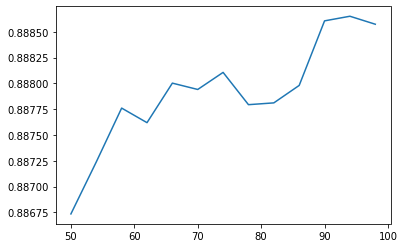

In [27]:
idx = train.sample(100000).index
x = train.loc[idx].REGULARITY.values.reshape(-1, 1)

X_train, X_val, y_train, y_val = train_test_split(x, train.CHURN[idx], random_state=1)

scores = []
ks = range(50, 100, 4)
for k in tqdm(ks):
    
    knn = KNeighborsClassifier(k, weights='distance').fit(X_train, y_train)
    scores += [roc_auc_score(y_val, knn.predict_proba(X_val)[:, 1])]
    
plt.plot(ks, scores)

In [22]:
# idx = train.sample(100000).index
x = train.REGULARITY.values.reshape(-1, 1)

X_train, X_val, y_train, y_val = train_test_split(x, train.CHURN, random_state=1)
knn = RidgeClassifier(class_weight='balanced').fit(X_train, y_train)
roc_auc_score(y_val, knn.decision_function(X_val))

0.8894937381061545